In [15]:
import requests
import json
import os.path
import time
import csv
import pandas as pd 
import numpy as np
import matplotlib.pyplot as pt
import datetime as dt
import tqdm

from tqdm import tqdm
from matplotlib.pyplot import figure




In [16]:
root_url = 'https://api.binance.com/api/v1/klines'

symbol = 'BTCUSDT'

interval = '1h'

intervalnum = [int(a) for a in interval if a.isdigit()]

def convert(numList):
    num = ''.join(map(str, numList))
    return int(num)

if 'm' in interval:
    
    HRMS = 60000*convert(intervalnum)
    
if 'h' in interval:

    HRMS = 3600000*convert(intervalnum)

limit = 500

startTime = 1502942400000 #milliseconds #1502942400000 first binance time

endTime = startTime + limit * HRMS # 1hr = 3.6*10^6 milliseconds

url = root_url + '?symbol=' + symbol + '&interval=' + interval  + '&startTime=' + str(startTime) + '&endTime=' + str(endTime)
  

data = json.loads(requests.get(url).text)




In [17]:
df = pd.DataFrame(data)
df.columns = ['open_time',
              'o', 'h', 'l', 'c', 'v',
              'close_time', 'qav', 'num_trades',
              'taker_base_vol', 'taker_quote_vol', 'ignore']
df.index = [dt.datetime.fromtimestamp(x/1000.0) for x in df.close_time]


In [18]:
def get_bars(symbol, interval, startTime, EndTime):
   url = root_url + '?symbol=' + symbol + '&interval=' + interval + '&startTime=' + str(startTime) + '&endTime=' + str(endTime)
   data = json.loads(requests.get(url).text)
   df = pd.DataFrame(data)
   if len(df)>0: 
        df.columns = ['open_time',
                 'o', 'h', 'l', 'c', 'v',
                 'close_time', 'qav', 'num_trades',
                 'taker_base_vol', 'taker_quote_vol', 'ignore']
        df.index = [dt.datetime.fromtimestamp(x/1000.0) for x in df.close_time]
        
   return df

In [19]:
tempt = time.time() * 1000
while (endTime< tempt):
    
    ndf = get_bars(symbol, interval, startTime, endTime)
    
    df = df.append(ndf)
        
    startTime = endTime + HRMS
    endTime = startTime + limit * HRMS
    
    
df


,open_time,o,h,l,c,v,close_time,qav,num_trades,taker_base_vol,taker_quote_vol,ignore
2017-08-16 23:59:59.999,1502942400000,4261.48000000,4313.62000000,4261.32000000,4308.83000000,47.18100900,1502945999999,202366.13839304,171,35.16050300,150952.47794304,7887.63551305
2017-08-17 00:59:59.999,1502946000000,4308.83000000,4328.69000000,4291.37000000,4315.32000000,23.23491600,1502949599999,100304.82356749,102,21.44807100,92608.27972836,8039.26240152
2017-08-17 01:59:59.999,1502949600000,4330.29000000,4345.45000000,4309.37000000,4324.35000000,7.22969100,1502953199999,31282.31266989,36,4.80286100,20795.31722405,8041.76049845
2017-08-17 02:59:59.999,1502953200000,4316.62000000,4349.99000000,4287.41000000,4349.99000000,4.44324900,1502956799999,19241.05829986,25,2.60229200,11291.34701534,8048.12788573
2017-08-17 03:59:59.999,1502956800000,4333.32000000,4377.85000000,4333.32000000,4360.69000000,0.97280700,1502960399999,4239.50358563,28,0.81465500,3552.74681715,8018.03650010
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-18 13:59:59.999,1605726000000,17775.91000000,17838.94000000,17553.80000000,17659.90000000,4560.57199200,1605729599999,80646857.81950578,68598,2156.22156600,38134667.21887993,0
2020-11-18 14:59:59.999,1605729600000,17659.90000000,17741.00000000,17490.00000000,17642.93000000,4705.04122700,1605733199999,82782541.38814804,67998,2110.48376100,37147396.86639594,0
2020-11-18 15:59:59.999,1605733200000,17642.92000000,17781.39000000,17586.62000000,17762.64000000,2939.84139400,1605736799999,52012373.84288716,47430,1580.24073100,27957038.22435841,0
2020-11-18 16:59:59.999,1605736800000,17762.64000000,17855.00000000,17700.00000000,17806.03000000,2192.24311900,1605740399999,38982845.19157995,60759,1083.95990700,19275524.57255151,0


<IPython.core.display.Javascript object>


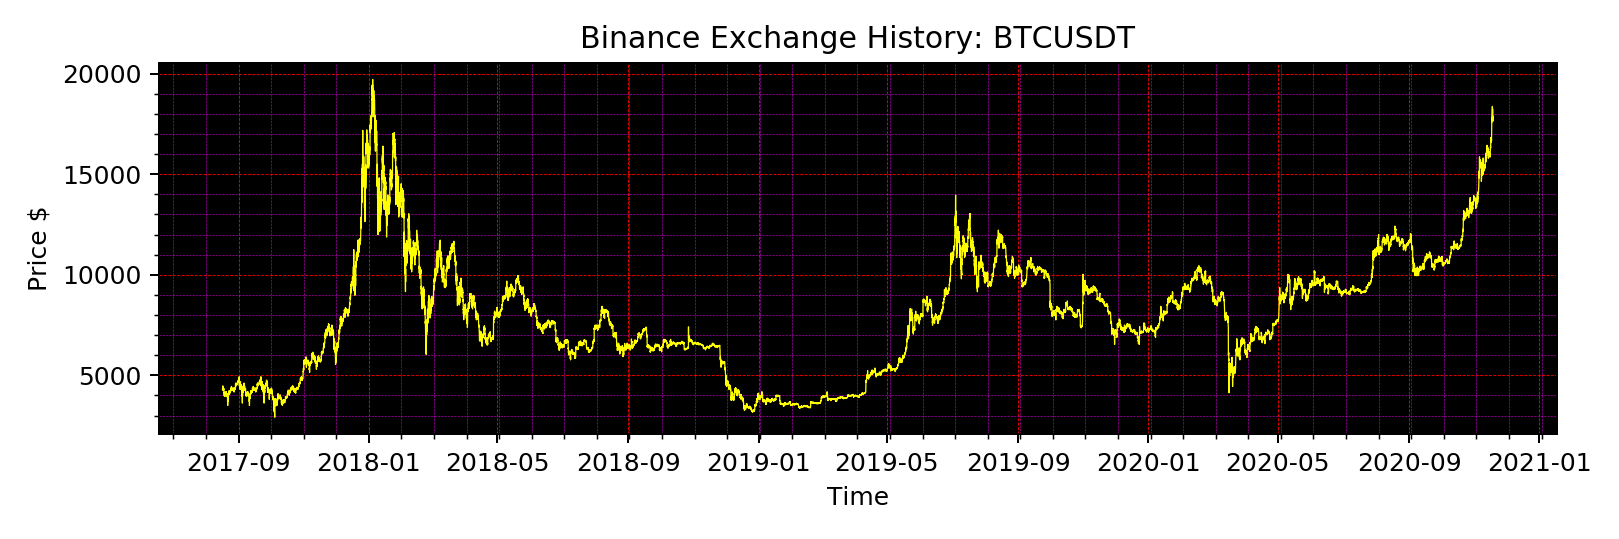

In [20]:
binancexOT = df['open_time']
binancexO = df['o'].astype('float')
binancexH = df['h'].astype('float')
binancexL = df['l'].astype('float')
binancexC = df['c'].astype('float')
binancexV = df['v'].astype('float')
binancexCT = df['close_time']
binancexQAV = df['qav'].astype('float')
binancexNT = df['num_trades'].astype('float')
binancexTBV = df['taker_base_vol'].astype('float')
binancexTQV = df['taker_quote_vol'].astype('float')




i = np.linspace(binancexOT[0], binancexCT[len(binancexCT)-1], len(binancexC))
i = [dt.datetime.fromtimestamp(x/1000.0) for x in i]


%matplotlib notebook
pt.figure(figsize= (9,3))
ax = pt.axes()
ax.set_facecolor('black')
pt.plot(i,binancexC,'-', color = '#ffff00', linewidth = 1/2)
pt.grid(b=True, which='major', color='r', linestyle='--', linewidth = 1/3)
pt.minorticks_on()
pt.grid(b=True, which='minor', color='m', linestyle='--', linewidth = 1/4)
pt.ylabel('Price $')
pt.xlabel('Time')
pt.title('Binance Exchange History: ' + symbol)
pt.tight_layout()

In [21]:
binancexLOCH = pd.concat([binancexL, binancexO, binancexC, binancexH], axis = 1) #combines open, close, keeping time indexed
binancexLOCH.to_csv('BTCUSDT/' + symbol + interval + str(startTime)+ '_' + str(endTime) + '.csv', index = False) #saves as CSV